# Installation des modules

In [ ]:
#!pip install -r requirements.txt

# To do list:
- Other normalization methods
- Users will need to be able to choose the normalization method they want to use.
- Prediction
- Cluster statistics
- DBSCAN


Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN


In [2]:
file_name ="test.csv"
df =  pd.read_csv(file_name)
#df.head()
numerical_columns = [i for i in df.columns if df[i].dtype == "int64" or df[i].dtype == "float64"]


# Part I: Initial Data Exploration

<span style='color:Red'>Ajouter un truc pour gérer les variables catégorielles</span>

In [ ]:
for i in df.columns:
    print(f'{i} is a ',df[f'{i}'].dtype)

In [ ]:
count_nan=df.isna().sum()
print(f"Il y'a {len(df.columns)} colonnes ({[i for i in df.columns]}) et {len(df)} lignes dans le fichier {file_name},\nLes NAN par colonnes sont: \n{count_nan}")
print ('Voilà la description plus précise des différentes colonnes du fichier :')
df.describe()

# Part II: Data Pre-processing and Cleaning

- Deleting columns with missing values: 

In [ ]:
def nan_to_remove_columns(df):
    count_nan=df.isna().sum()
    delete_c=False
    if delete_c:
        for i in df.columns:
            if count_nan[i] != 0:
                df.drop([i], axis=1, inplace=True)
    return df

- Remplacer les nan avec la moyenne

In [ ]:
def nan_to_mean(df):
    for i in df.columns:
        if df[i].dtype == "int64" or df[i].dtype == "float64":
            df[i].fillna(df[i].mean(), inplace=True)
    return df

- Remplacer les nan avec le mode

In [ ]:
def nan_to_mode(df):
    for i in df.columns:
        if df[i].dtype == "object":
            df[i].fillna(df[i].mode()[0], inplace=True)
    return df

- Remplacer les nan avec la mediane

In [ ]:
def nan_to_med(df):
    for i in df.columns:
        if df[i].dtype == "int64" or df[i].dtype == "float64":
            df[i].fillna(df[i].median(), inplace=True)
    return df

- Supprimer les missing values:

In [4]:
def remove_nan(df):
    df = df.dropna()
    return df

- Remplacer les nan avec Knn imputer

In [ ]:
def nan_to_knn_imputer(df,n_neighbors=3):
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df[[i for i in numerical_columns]] = knn_imputer.fit_transform(df[[i for i in numerical_columns]])
    print("\nDataFrame after KNN Imputation:")
    print(df.isna().sum())
    return df
        

# Normalisation
* <span style='color:Red'>Other normalization methods</span>

In [ ]:
scaler = StandardScaler().fit(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])
df

In [3]:
def min_max_normalization(df):
    scaler =MinMaxScaler()
    numerical_columns = []
    for i in df.columns:
        if df[i].dtype == "int64" or df[i].dtype == float:
            numerical_columns.append(i)
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

In [ ]:
def Z_score(df):
    scaler = StandardScaler()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    print("\nDataFrame after Z-score standardization:")
    print(df)
    return df

# Part III: Visualization of the cleaned data

In [ ]:
df.hist(bins=10,figsize=(6, 6), grid=True)
plt.suptitle('Histograms of Numerical Columns in DataFrame', fontsize=16)
plt.show()

In [ ]:
df.boxplot(column=numerical_columns, figsize=(6, 6))
plt.suptitle('Box Plots of Numerical Columns in DataFrame', fontsize=16)
plt.show()

# Part IV: Clustering or prediction

## Clustering

- Elbow Method For Optimal k

In [ ]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_columns].values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(3, 3))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()

- Kmeans

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

DBscan (you MUST normalise the data before)

<span style='color:Red'> We must find how get the optimal esp (esp represente the distance between the points)</span>

In [10]:
df[numerical_columns] = min_max_normalization(df[numerical_columns])
df = remove_nan(df)
clustering = DBSCAN(eps=0.3, min_samples=2).fit(df[numerical_columns])
clustering.labels_
df['Cluster']=clustering.labels_

C:\Users\mopi7\AppData\Local\Temp\ipykernel_16032\457192083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


## <span style='color:Red'>Prediction</span>

# Part V: Learning Evaluation


2D

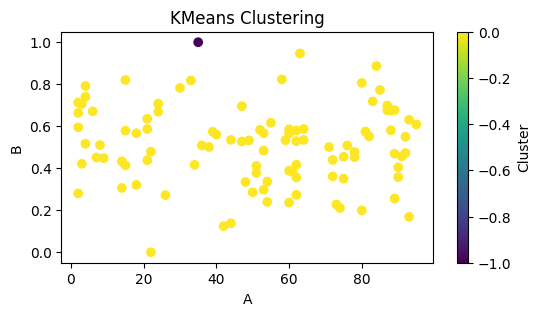

In [11]:
chosen_params = ['A','B']
optimal_k = 3
plt.figure(figsize=(6, 3))
plt.scatter(df[chosen_params[0]], df[chosen_params[1]], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('A')
plt.ylabel('B')
plt.colorbar(label='Cluster')
plt.show()

3D

In [ ]:
chosen_params = ['A','B','C']
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[chosen_params[0]], df[chosen_params[1]], df[chosen_params[2]], 
                     c=df['Cluster'], cmap='viridis', marker='o')
ax.set_title('KMeans Clustering')
ax.set_xlabel(chosen_params[0])
ax.set_ylabel(chosen_params[1])
ax.set_zlabel(chosen_params[2])
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.show()

<span style='color:Red'>Cluster statistics: </span>

<span style='color:Red'>Mode prediction</span>